<a href="https://colab.research.google.com/github/syamachandrika/Titanic-Classification/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file = '/content/drive/MyDrive/titanic'

In [4]:
titanic = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
print("Proportion of Survived:",sum(titanic['Survived']==1)/len(titanic['Survived']))
print("Proportion of NOT Survived:",sum(titanic['Survived']==0)/len(titanic['Survived']))
titanic['Sex'].value_counts()

Proportion of Survived: 0.3838383838383838
Proportion of NOT Survived: 0.6161616161616161


male      577
female    314
Name: Sex, dtype: int64

In [14]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
titanic['Pclass'].value_counts()
titanic.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [16]:
titanic[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
titanic[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

<Axes: xlabel='Sex', ylabel='Survived'>

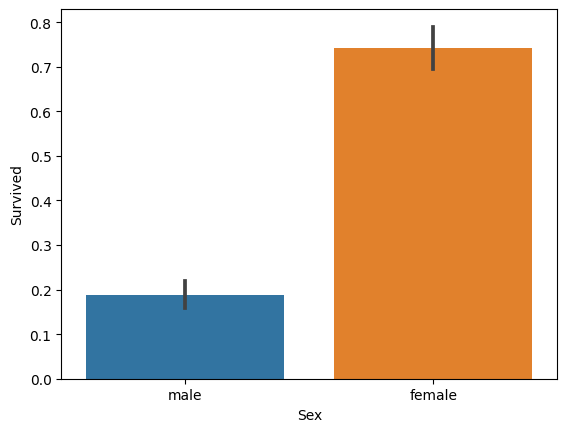

In [19]:
sns.barplot(x='Sex',y='Survived',data=titanic)

<Axes: xlabel='Sex', ylabel='Survived'>

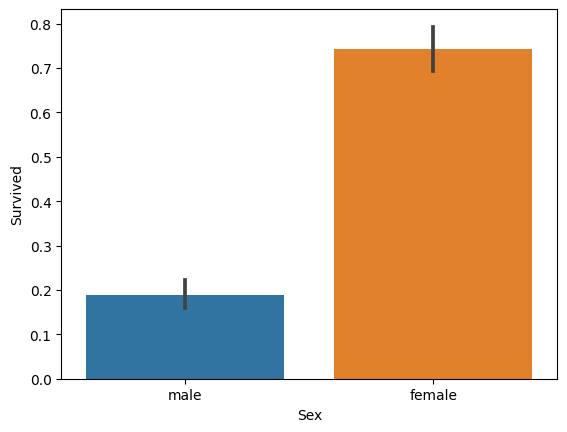

In [20]:
sns.barplot(x='Sex',y='Survived',data=titanic)

In [21]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [23]:
titanic[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

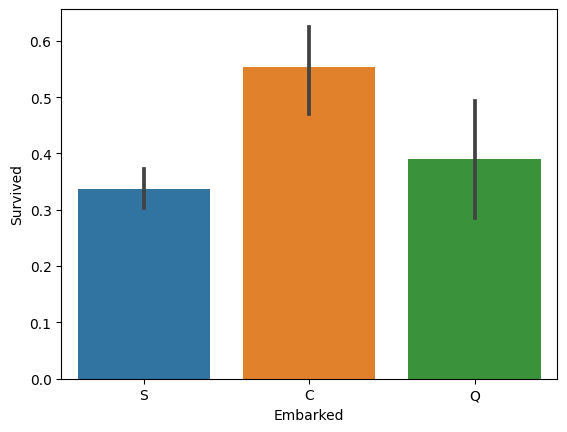

In [24]:
sns.barplot(x='Embarked',y='Survived',data=titanic)

In [25]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
titanic.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [27]:
titanic[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

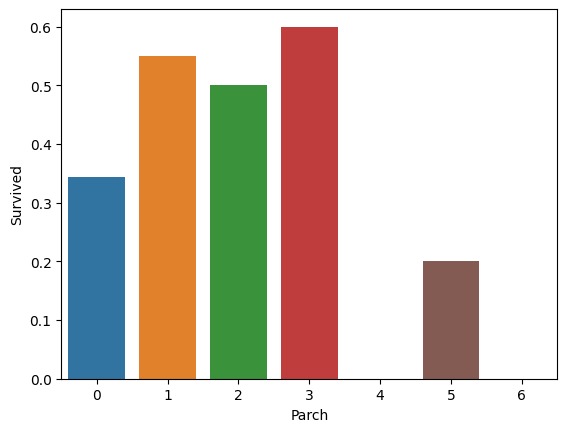

In [28]:
sns.barplot(x='Parch',y='Survived',data=titanic,ci=None)

In [29]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
titanic.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [31]:
titanic[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

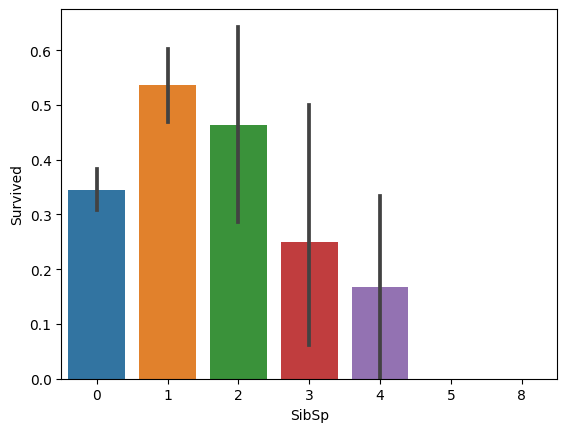

In [32]:
sns.barplot(x='SibSp',y='Survived',data=titanic)

<Axes: xlabel='Embarked', ylabel='Age'>

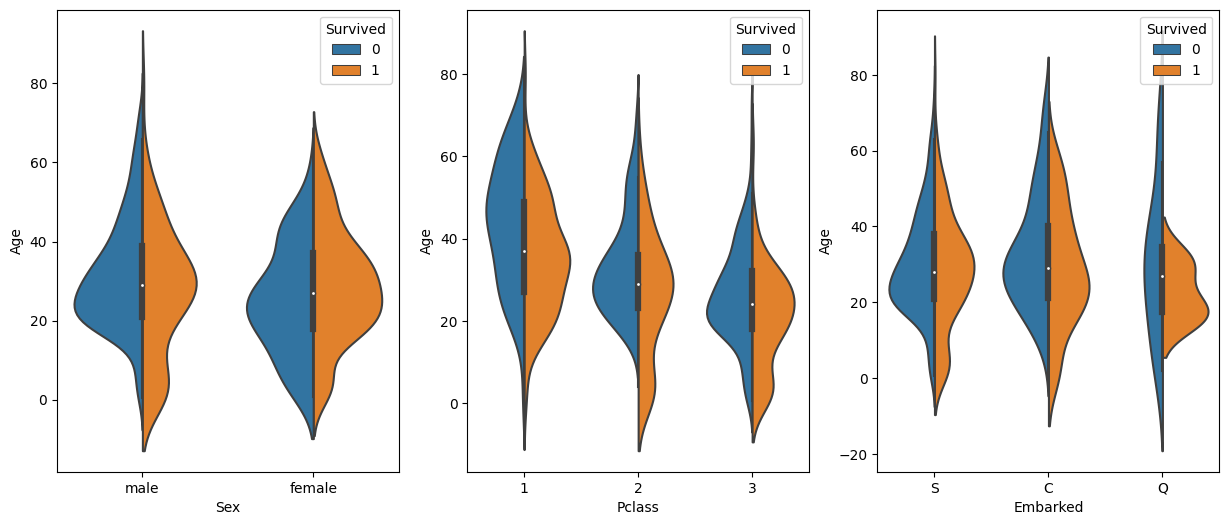

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.violinplot(x='Sex',y='Age',data=titanic,hue='Survived',split=True)
plt.subplot(1,3,2)
sns.violinplot(x='Pclass',y='Age',data=titanic,hue='Survived',split=True)
plt.subplot(1,3,3)
sns.violinplot(x='Embarked',y='Age',data=titanic,hue='Survived',split=True)

In [34]:
train_test_df = [titanic,titanic_test]
for df in train_test_df:
    df['Sex'] = df['Sex'].map({'female':1,'male':0})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [39]:
for df in train_test_df:
    df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


<Axes: >

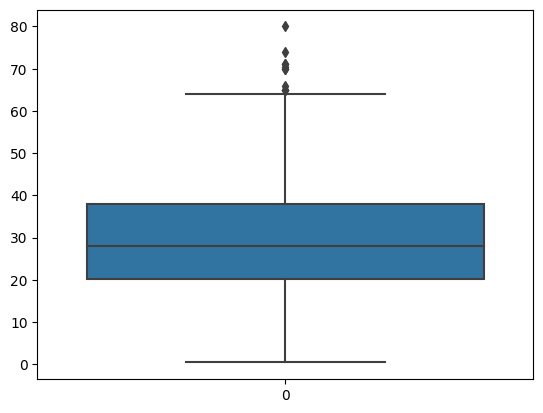

In [40]:
sns.boxplot(titanic['Age'])

In [42]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()).astype(int)
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean()).astype(int)
for df in train_test_df:
    df.loc[(df['Age']<=10),'Age'] = 0
    df.loc[(df['Age']>10) & (df['Age']<=21) ,'Age'] = 1
    df.loc[(df['Age']>21) & (df['Age']<=35) ,'Age'] = 2
    df.loc[(df['Age']>35) & (df['Age']<=50) ,'Age'] = 3
    df.loc[(df['Age']>50) & (df['Age']<=65) ,'Age'] = 4
    df.loc[(df['Age']>65),'Age'] = 5

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,8.0500,NaN,0


<Axes: >

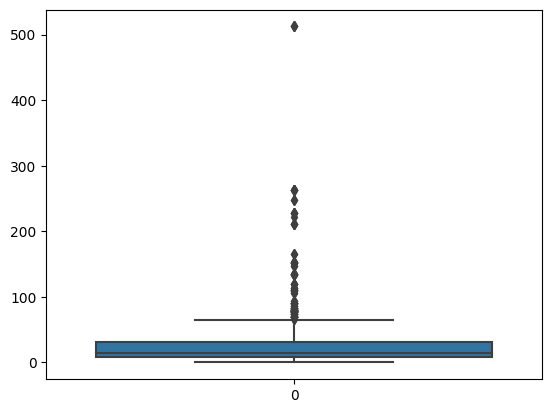

In [44]:
sns.boxplot(titanic['Fare'])

In [45]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median()).astype(int)
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median()).astype(int)
for df in train_test_df:
    df.loc[(df['Fare']<=2),'Fare'] = 0
    df.loc[(df['Fare']>2) & (df['Fare']<=5) ,'Fare'] = 2
    df.loc[(df['Fare']>5) & (df['Fare']<=8) ,'Fare'] = 3
    df.loc[(df['Fare']>8) & (df['Fare']<=15) ,'Fare'] = 4
    df.loc[(df['Fare']>15) & (df['Fare']<=50) ,'Fare'] = 5
    df.loc[(df['Fare']>50),'Fare'] = 6
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,3,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,6,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,3,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,6,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,3,NaN,0


In [46]:
for df in train_test_df:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+\.)')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,3,NaN,0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,6,C85,1,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,3,NaN,0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,6,C123,0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,3,NaN,0,Mr.


In [47]:
titanic['Title'].unique()
titanic_test.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [48]:
titanic['Title'] = titanic['Title'].replace(['Don.','Dona.','Rev.','Dr.','Major.','Lady.', 'Sir.', 'Col.', 'Capt.','Countess.', 'Jonkheer.'],'Other')
titanic['Title'] = titanic['Title'].replace('Ms.','Miss.')
titanic['Title'] = titanic['Title'].replace('Mlle.','Miss.')
titanic['Title'] = titanic['Title'].replace('Mme.','Miss.')
titanic_test['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [49]:
titanic_test['Title'] = titanic_test['Title'].replace(['Don.','Dona.','Rev.','Dr.','Major.','Lady.', 'Sir.', 'Col.', 'Capt.','Countess.', 'Jonkheer.'],'Other')
titanic_test['Title'] = titanic_test['Title'].replace('Ms.','Miss.')
titanic_test['Title'] = titanic_test['Title'].replace('Mlle.','Miss.')
titanic_test['Title'] = titanic_test['Title'].replace('Mme.','Miss.')
titanic_test['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Other'], dtype=object)

In [50]:
for df in train_test_df:
    df['Title'] = df['Title'].map({'Mr.':0,'Mrs.':1,'Miss.':2,'Master.':3,'Other':4})
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,3,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,6,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,3,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,6,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,3,NaN,0,0


In [52]:
for df in train_test_df:
    df['FamilySize'] = df['SibSp'] +  df['Parch'] + 1
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [53]:
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic_test['Cabin'] = titanic_test['Cabin'].fillna('Missing')
titanic_test['Cabin'] = titanic_test['Cabin'].str[:1]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,0,1,0,A/5 21171,3,M,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,PC 17599,6,C,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,0,STON/O2. 3101282,3,M,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,113803,6,C,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,0,0,0,373450,3,M,0,0,1


In [54]:
titanic['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [55]:
features_drop = ['Name', 'Ticket']
titanic = titanic.drop(features_drop, axis=1)
titanic_test = titanic_test.drop(features_drop, axis=1)
titanic = titanic.drop(['PassengerId'], axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
t_cabin = le.fit_transform(titanic['Cabin'])
te_cabin = le.fit_transform(titanic_test['Cabin'])
t_cabin = pd.DataFrame(t_cabin,columns=['Cabins'])
te_cabin = pd.DataFrame(te_cabin,columns=['Cabins'])
t_cabin.head()

,Cabins
0,7
1,2
2,7
3,2
4,7


In [56]:
titanic = pd.concat([titanic,t_cabin],axis=1)
titanic.head()
titanic_test = pd.concat([titanic_test,te_cabin],axis=1)
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,Cabins
0,892,3,0,0,0,0,3,M,2,0,1,7
1,893,3,1,0,1,0,3,M,0,1,2,7
2,894,2,0,0,0,0,4,M,2,0,1,7
3,895,3,0,0,0,0,3,M,0,0,1,7
4,896,3,1,0,1,1,4,M,0,1,3,7


In [57]:
features_drop = ['Cabin']
titanic = titanic.drop(features_drop, axis=1)
titanic_test = titanic_test.drop(features_drop, axis=1)
titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Cabins
886,0,2,0,0,0,0,4,0,4,1,7
887,1,1,1,0,0,0,5,0,2,1,1
888,0,3,1,0,1,2,5,0,2,4,7
889,1,1,0,0,0,0,5,1,0,1,2
890,0,3,0,0,0,0,3,2,0,1,7


In [58]:
titanic.groupby(['Survived','Age'])['Age'].count()

Survived  Age
0         0      549
1         0      342
Name: Age, dtype: int64

In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   SibSp       891 non-null    int64
 5   Parch       891 non-null    int64
 6   Fare        891 non-null    int64
 7   Embarked    891 non-null    int64
 8   Title       891 non-null    int64
 9   FamilySize  891 non-null    int64
 10  Cabins      891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


In [60]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
 8   Title        418 non-null    int64
 9   FamilySize   418 non-null    int64
 10  Cabins       418 non-null    int64
dtypes: int64(11)
memory usage: 36.0 KB


In [61]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Cabins
0,892,3,0,0,0,0,3,2,0,1,7
1,893,3,1,0,1,0,3,0,1,2,7
2,894,2,0,0,0,0,4,2,0,1,7
3,895,3,0,0,0,0,3,0,0,1,7
4,896,3,1,0,1,1,4,0,1,3,7


In [62]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
 8   Title        418 non-null    int64
 9   FamilySize   418 non-null    int64
 10  Cabins       418 non-null    int64
dtypes: int64(11)
memory usage: 36.0 KB


In [63]:
feature1 = ['Pclass','Sex','Cabins','FamilySize']
feature2 = ['Age','SibSp','Fare']
feature3 = ['Parch','Embarked','Title']
X_train = titanic.drop('Survived',axis=1)
y_train = titanic['Survived']
X_test = titanic_test.drop('PassengerId',axis=1).copy()
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
Cabins        0
dtype: int64

In [64]:
X_train1 = X_train[feature1+feature3]
X_train2 = X_train[feature2+feature3]
X_train3 = X_train[feature1+feature2]
X_test1 = X_test[feature1+feature3]
X_test2 = X_test[feature2+feature3]
X_test3 = X_test[feature1+feature2]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 10)
(891,)
(418, 10)


In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_train, y_train)
score
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
score = svc.score(X_train, y_train)
score

0.8204264870931538

In [66]:
lnsvc = LinearSVC()
lnsvc.fit(X_train,y_train)
y_pred_lnsvc = lnsvc.predict(X_test)
score = lnsvc.score(X_train, y_train)
score

0.7878787878787878

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
score = dtc.score(X_train, y_train)
score

0.8866442199775533

In [68]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
score = rfc.score(X_train, y_train)
score

0.8866442199775533

In [69]:
rfc3 = RandomForestClassifier(n_estimators=100)
rfc3.fit(X_train3,y_train)
y_pred_rfc3 = rfc3.predict(X_test3)
score3 = rfc3.score(X_train3, y_train)
score3

0.8540965207631874

In [70]:
import xgboost
classifier1 = xgboost.XGBClassifier()
classifier1.fit(X_train1, y_train)
# Predicting the Test set results
y_pred_XGB1 = classifier1.predict(X_test1)
acc_XGB1 = round( classifier1.score(X_train1, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB1) + '%')
y_pred_XGB1.shape

Train Accuracy: 87.21%


(418,)

In [71]:
import xgboost
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train2, y_train)
# Predicting the Test set results
y_pred_XGB2 = classifier2.predict(X_test2)
acc_XGB2 = round( classifier2.score(X_train2, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB2) + '%')
y_pred_XGB2.shape

Train Accuracy: 85.3%


(418,)

In [72]:
import xgboost
classifier3 = xgboost.XGBClassifier()
classifier3.fit(X_train3, y_train)
# Predicting the Test set results
y_pred_XGB3 = classifier3.predict(X_test3)
acc_XGB3 = round( classifier3.score(X_train3, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB3) + '%')
y_pred_XGB3.shape

Train Accuracy: 85.19%


(418,)

In [73]:
import lightgbm as lgb
train_data3=lgb.Dataset(X_train3,label=y_train)
#define parameters
params = {'n_estimators':200,'objective':'binary','learning_rate':0.1,'max_depth': 10,'num_leaves':'100','min_data_in_leaf':9,'max_bin':100,'boosting_type':'gbdt',}
model3= lgb.train(params, train_data3, 200)
y_pred_LGB3=model3.predict(X_test3)
#rounding the values
y_pred_LGB3=y_pred_LGB3.round(0)
#converting from float to integer
y_pred_LGB3=y_pred_LGB3.astype(int)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [74]:
import lightgbm as lgb
train_data2=lgb.Dataset(X_train2,label=y_train)
#define parameters
params = {'n_estimators':200,'objective':'binary','learning_rate':0.1,'max_depth': 10,'num_leaves':'100','min_data_in_leaf':9,'max_bin':100,'boosting_type':'gbdt',}
model2= lgb.train(params, train_data2, 200)
y_pred_LGB2=model2.predict(X_test2)
#rounding the values
y_pred_LGB2=y_pred_LGB2.round(0)
#converting from float to integer
y_pred_LGB2=y_pred_LGB2.astype(int)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [75]:
import lightgbm as lgb
train_data1=lgb.Dataset(X_train1,label=y_train)
#define parameters
params = {'n_estimators':200,'objective':'binary','learning_rate':0.1,'max_depth': 10,'num_leaves':'100','min_data_in_leaf':9,'max_bin':100,'boosting_type':'gbdt',}
model1= lgb.train(params, train_data1, 200)
y_pred_LGB1=model1.predict(X_test1)
#rounding the values
y_pred_LGB1=y_pred_LGB1.round(0)
#converting from float to integer
y_pred_LGB1=y_pred_LGB1.astype(int)
Mix_XGB = (y_pred_LGB1 +  y_pred_LGB2 + y_pred_LGB3)/3
Mix_XGB = pd.DataFrame(Mix_XGB,columns=['Survived'])
#rounding the values
#Mix_XGB=Mix_XGB.round(0)
#converting from float to integer
#Mix_XGB=Mix_XGB.astype(int)
Mix_XGB['Survived'] = Mix_XGB['Survived'].apply(lambda x: 1 if x > 0.5 else 0)

submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Mix_XGB['Survived']
    })

submission.to_csv('gender_submission.csv', index=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [76]:
submission.Survived.value_counts()

0    268
1    150
Name: Survived, dtype: int64

In [77]:
votingC = VotingClassifier(estimators=[('LGR', lr),
 ('DTC',dtc),('RFC',rfc),('RFC_3',rfc3),('XGB_1',classifier1),('XGB_2',classifier2),('XGB_3',classifier3)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)
vote = votingC.predict(X_test)
submission_v = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": vote
    })

submission_v.to_csv('Vote_submission.csv', index=False)

In [78]:
submission_v.Survived.value_counts()

0    265
1    153
Name: Survived, dtype: int64